## Problem 1:

### Approximate the following function:
$\Large f ( x ) = 3x^2 + 4x - 9 $


### Steps:
1. Randomly generate the data. Generate at least 10,000 values for $x \in [-100,100]$
2. Plot the function
3. Design a feed-forward network with 2 or more hidden layers. Choose the # of hidden units in each layer (what are the size of input and output layers?)
4. Train the model (What loss function will be suitable here?)
5. Generate a test data and present the test accuracy

Epoch 1/100
200/200 [==============================] - 1s 1ms/step - loss: 179420464.0000 - mse: 179420464.0000
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 179330496.0000 - mse: 179330496.0000
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 179055920.0000 - mse: 179055920.0000
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 178407888.0000 - mse: 178407888.0000
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 177173040.0000 - mse: 177173040.0000
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 175299344.0000 - mse: 175299344.0000
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 172746944.0000 - mse: 172746928.0000
Epoch 8/100
200/200 [==============================] - 0s 1ms/step - loss: 169494832.0000 - mse: 169494832.0000
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 165548576.0000 - mse: 1655485

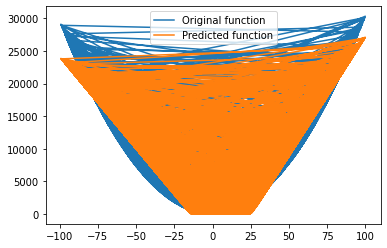

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate 10,000 random values for x in the range [-100, 100]
x_train = np.random.uniform(low=-100, high=100, size=10000)

# Define the function we want to approximate
def f(x):
    return 3*x**2 + 4*x - 9

# Generate training labels for the function
y_train = f(x_train)

# Normalize the input data to have zero mean and unit variance
x_mean = np.mean(x_train)
x_std = np.std(x_train)
x_train = (x_train - x_mean) / x_std

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model with mean squared error loss and stochastic gradient descent optimizer
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

# Train the model for 100 epochs with batch size of 32
model.fit(x_train, y_train, epochs=100, batch_size=50)

# Generate 1,000 random values for x in the range [-100, 100] for testing
x_test = np.random.uniform(low=-100, high=100, size=1000)
x_test_norm = (x_test - x_mean) / x_std

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test_norm, f(x_test))

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

# Plot the original function and the predicted function on the test data
plt.plot(x_test, f(x_test), label='Original function')
plt.plot(x_test, model.predict(x_test_norm), label='Predicted function')
plt.legend()
plt.show()


## Problem 2:

### Feedforward Network
- Hidden layer 1
- Input size 784 [28X28] image
- Hidden layer units 500
- Output size 10
- Other Hyperparameters:
 - num_epochs = 5
 - batch_size = 100
 - learning_rate = 0.001

### Try out different regularization and optimization techniques and vary the corresponding hyperparameters
- Hidden layers/units per layer
- L2 regularization
- Dropout
- RMSProp
- Adam
- Minibatches

### Tabulate your findings

In [ ]:
import torch 
import torch.nn as nn
import numpy as np


import torchvision
import torchvision.transforms as transforms

In [ ]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 200
learning_rate = 0.001

### Defining the network

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        # self.BatchNorm1d= nn.BatchNorm1d(hidden_size) ##[Optional batch normalization]
        # self.dropout=nn.Dropout(0.25) ##[Optional dropout]
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
        self.output = nn.Softmax() #nn.Linear if y is real-valued
        self.float()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        out = self.output(out)
        
        return out

### Loading the datasets

<i> 
#### Note: If the following code does not work, do the following:
- open a terminal and enter
- pip install ipywidgets
- jupyter nbextension enable --py widgetsnbextension

#### If the second line shows [OK], it should work </i>

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, shuffle=True)

In [ ]:
test_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=False, 
                                           transform=transforms.ToTensor(),download=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, shuffle=True)

##### Display samples

8


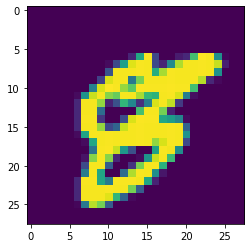

In [ ]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    print(labels[0].item())
 
    plt.imshow(images[0].reshape((28,28)))
    break

In [ ]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

### Train the model

In [ ]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Reconfigure the images into a 1D vector (actually, (X,1) tensor)
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # display the progress
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        

<ipython-input-101-01f13d7e8f67>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.output(out)


Epoch [1/5], Step [100/300], Loss: 1.7953
Epoch [1/5], Step [200/300], Loss: 1.6492
Epoch [1/5], Step [300/300], Loss: 1.6126
Epoch [2/5], Step [100/300], Loss: 1.6362
Epoch [2/5], Step [200/300], Loss: 1.6236
Epoch [2/5], Step [300/300], Loss: 1.5781
Epoch [3/5], Step [100/300], Loss: 1.5506
Epoch [3/5], Step [200/300], Loss: 1.5442
Epoch [3/5], Step [300/300], Loss: 1.5246
Epoch [4/5], Step [100/300], Loss: 1.5273
Epoch [4/5], Step [200/300], Loss: 1.5024
Epoch [4/5], Step [300/300], Loss: 1.5006
Epoch [5/5], Step [100/300], Loss: 1.5171
Epoch [5/5], Step [200/300], Loss: 1.5337
Epoch [5/5], Step [300/300], Loss: 1.5053


#### Taking 4 samples from the test set 
- display the image
- print the true label
- print the output probability distribution
- print the predicted class

In [ ]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network is: {} %'.format(100 * correct / total))

<ipython-input-101-01f13d7e8f67>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.output(out)


Accuracy of the network is: 95.03 %


<ipython-input-101-01f13d7e8f67>:16: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = self.output(out)


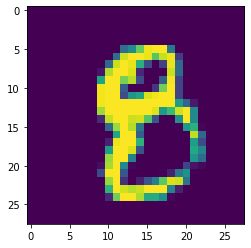

True label: 8
Output probabilities: tensor([0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.2320,
        0.0853])
Predicted class: 8


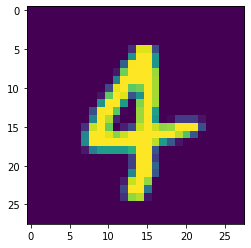

True label: 4
Output probabilities: tensor([0.0864, 0.0864, 0.0864, 0.0864, 0.2141, 0.0864, 0.0866, 0.0865, 0.0864,
        0.0944])
Predicted class: 4


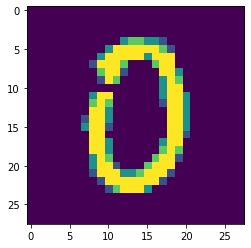

True label: 0
Output probabilities: tensor([0.2319, 0.0853, 0.0853, 0.0853, 0.0853, 0.0854, 0.0853, 0.0853, 0.0853,
        0.0853])
Predicted class: 0


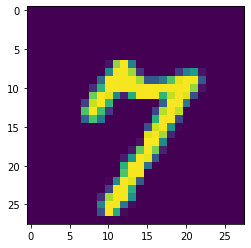

True label: 7
Output probabilities: tensor([0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.0853, 0.2320, 0.0853,
        0.0853])
Predicted class: 7


In [ ]:
images, labels = next(iter(test_loader))

# Make predictions on the batch of images
with torch.no_grad():
    # Reshape the images into a 1D vector
    images = images.view(images.size(0), -1)
    
    # Forward propagate the images through the model
    outputs = model(images)
    
    # Compute the predicted class probabilities and predicted class labels
    probs = torch.softmax(outputs, dim=1)
    pred_labels = torch.argmax(probs, dim=1)

# Loop over the images in the batch
for i in range(4):
    # Display the image
    plt.imshow(images[i].view(28, 28))
    plt.show()
    
    # Print the true label
    print('True label:', labels[i].item())
    
    # Print the output probability distribution
    print('Output probabilities:', probs[i])
    
    # Print the predicted class
    print('Predicted class:', pred_labels[i].item())


In [ ]:
from prettytable import PrettyTable

# Create a table object with column names
table = PrettyTable()
table.field_names = ["Experiment","Total Layers", "Units per Layer",  "Dropout", "Optimizer", "Learning Rate", "Batch Size", "Num of epoches","Test Accuracy"]

# Add rows to the table
table.add_row(["1", "2", "500",  "-", "Adam", "0.001", "150","5", "95.41%"])
table.add_row(["2", "2", "500", "-", "RMSProp", "0.001", "150", "5", "95.6%"])
table.add_row(["3", "2", "500", "0.25", "Adam", "0.001", "150","5", "95.1%"])
table.add_row(["4", "2", "500",  "0.25", "RMSProp", "0.001", "150","5", "95.45%"])
table.add_row(["5", "2", "500", "0.25", "RMSProp", "0.010", "150","5", "48.1%"])
table.add_row(["6", "2", "500",  "0.25", "Adam", "0.010", "150","5", "48.3%"])
table.add_row(["7", "2", "550", "0.20", "RMSProp", "0.0010", "200","5", "95.35%"])
table.add_row(["8", "2", "550", "0.25", "Adam", "0.0010", "200","5", "95.01%"])
table.add_row(["9", "2", "550", "0.20", "Adam", "0.0010", "200","10", "96.44%"])
table.add_row(["10", "2", "600", "0.20", "SGD", "0.0020", "128","5", "11.35%"])
# Print the table
print(table)


+------------+--------------+-----------------+---------+-----------+---------------+------------+----------------+---------------+
| Experiment | Total Layers | Units per Layer | Dropout | Optimizer | Learning Rate | Batch Size | Num of epoches | Test Accuracy |
+------------+--------------+-----------------+---------+-----------+---------------+------------+----------------+---------------+
|     1      |      2       |       500       |    -    |    Adam   |     0.001     |    150     |       5        |     95.41%    |
|     2      |      2       |       500       |    -    |  RMSProp  |     0.001     |    150     |       5        |     95.6%     |
|     3      |      2       |       500       |   0.25  |    Adam   |     0.001     |    150     |       5        |     95.1%     |
|     4      |      2       |       500       |   0.25  |  RMSProp  |     0.001     |    150     |       5        |     95.45%    |
|     5      |      2       |       500       |   0.25  |  RMSProp  |     0.